# Leveraging Machine Learning to Predict Peptide Presentation by MHC Proteins
**by: MUHAMMAD TALHA WAQAS**

## TASK DESCRIPTION

The problem revolves around the fact whether a particular peptide sequence will be presented by a specific MHC class I (MHC1) protein, denoted by its allele name. MHC proteins have the ability to display peptides, which are short chains of amino acids, on the surface of cells. By providing T cells with peptides, MHC1 proteins play a critical function in the immune system by allowing the immune system to keep an eye on cells for indications of infection or aberrant activity.

Because of genetic variants in the MHC1 genes, or alleles, each person has a distinct collection of MHC1 proteins. Individual differences in MHC1 proteins enable the immune system to identify a broad spectrum of possible dangers, such as infections and cancerous cells.

Understanding immune responses and creating immunotherapies, especially for the treatment of cancer, depend on identifying the precise peptides that MHC proteins present. Treatments that are less harmful and more successful can be achieved by focusing on particular peptides that are provided by MHC1 proteins. This will assist activate the immune system to identify and destroy cancer cells while preserving healthy cells.



## OBJECTIVE

The primary objective is to build a predictive model that can accurately determine whether a given peptide sequence will be presented by a specific MHC1 protein, based on its allele name. The model will be trained on the dataset containing peptide sequences, corresponding allele names, and binary labels indicating peptide presentation i.e., '1' if the peptide is present and '0' for else.

The ultimate goal is to develop a robust classifier that can assist in identifying peptides with potential immunogenic properties, facilitating the discovery and development of novel immunotherapies for various diseases, including cancer.


## SECTIONS

The Jupyter Notebook for this task is divided into 4 sections, each section containing the code and descriptions to reach the intended goal of the task. The Four sections of this notebook are:

**1. DATASET ANALYSIS:**

This section delves into exploring the dataset, examining its characteristics, and uncovering potential issues. It includes an analysis of key statistics such as the distribution of target variables, alleles, and peptide lengths. Additionally, missing values are checked to ensure data integrity.

**2. METHOD EXPLANATION:**

Here, the methods employed in the approach of this task are explained. Random Forest Classifier, a robust ensemble learning algorithm, is described and explained, as well as the concept of one-hot encoding for peptide sequences and alleles, a technique crucial for representing categorical data in machine learning models. References are also provided in this section as required.

**3. EXPERIMENT DESCRIPTION:**

This section outlines experimental approach to showcase the effectiveness of the proposed methods. The process of training Random Forest Classifier using one hot encoded sequences of peptides and alleles are explained .


**4. RESULT ANALYSIS:**

In the final section, outcomes of the experiments are analysed. The model's performance metrics, including accuracy, precision, recall, and F1-score, on both training and test sets are scrutinized. Furthermore, a confusion matrix is made to gain insights into the model's predictive capabilities and potential areas for enhancement. In the end, recommendations are given for further imrpoving the model with references.



## 1. DATASET ANALYSIS

Firstly, the necessary libraries needed for this task are loaded in the code cell below.

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In the next step, all the five folds of the training data are loaded and concatented using Pandas to create `train_data`, containing the entire data from the five folds. The `test.csv` data was loaded into `test_data` using Pandas. After that, random sampling and 10,000 values from the `train_data` were selected to create `train_data_sample` in order to balance computational efficiency and representativeness, while the entire test dataset (`test_data`) will be used for comprehensive model evaluation to assess its generalization performance on unseen data.

In [3]:
train_data = pd.concat([pd.read_csv(f"fold_{i}.csv") for i in range(5)], ignore_index=True)
test_data = pd.read_csv("test.csv")

# Sampling a smaller fraction of the data, using 10,000 samples
train_data_sample = train_data.sample(n=10000, random_state=42)

train_data_sample.head()

,peptide,allele,hit
546550,NLPPLYRALT,HLA-B*51:01,0
316695,GVPIVDNQEDR,HLA-B*15:01,0
732715,TTFWLTREE,HLA-C*16:01,0
3185545,SEVALMTTSV,HLA-A*31:01,0
1396151,SWGLDYIVLTS,HLA-C*04:01,0


Next, the `describe` function of pandas is used to gain a statistical understanding of the dataset:

In [3]:
train_data_sample.describe()



,hit
count,10000.000000
mean,0.054800
std,0.227601
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


To understand the types of each column, `info` function of pandas will be used:

In [4]:
train_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 546550 to 272425
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   peptide  10000 non-null  object
 1   allele   10000 non-null  object
 2   hit      10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


'peptide' and 'allele' have the 'object' datatype associated with them, whereas the target variable 'hit' is numeric and has the 'int64' or integer data type associated with it.

Next, any null values in the training data will be checked:

In [5]:
train_data_sample.isnull().sum()

peptide    0
allele     0
hit        0
dtype: int64

There are no null values in the training data.

Next, distribution of target variable, alleles and the peptide length distribution will be checked.`value_counts()` will be used for 'allele' and 'hit', but `desribe()` function for peptide length distribution, as it provides a summary of key statistics for the peptide length distribution, offering insights into the central tendency and variability of the data. While `value_counts()` could show the frequency of specific peptide lengths, `describe()` offers a more comprehensive overview of the distribution's characteristics, facilitating quantitative analysis and identification of outliers.

In [45]:
#Check distribution of target variable
print("Target Variable Distribution:")
print(train_data_sample['hit'].value_counts())

#Check distribution of alleles
print("Allele Distribution:")
print(train_data_sample['allele'].value_counts())

#Check length distribution of peptides
train_data_sample['peptide_length'] = train_data_sample['peptide'].apply(len)
print("Peptide Length Distribution:")
print(train_data_sample['peptide_length'].describe())

Target Variable Distribution:
0    9452
1     548
Name: hit, dtype: int64
Allele Distribution:
HLA-A*02:01    705
HLA-B*07:02    538
HLA-B*57:01    498
HLA-A*29:02    495
HLA-B*40:02    395
              ... 
HLA-B*39:05      1
HLA-B*15:17      1
HLA-B*37:01      1
HLA-B*41:04      1
HLA-B*41:05      1
Name: allele, Length: 99, dtype: int64
Peptide Length Distribution:
count    10000.000000
mean        10.834500
std          1.968577
min          8.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         15.000000
Name: peptide_length, dtype: float64


In [4]:
test_data['allele'].value_counts()

HLA-A02:02    77053
HLA-A02:06    54510
HLA-A02:11    48445
HLA-B53:01    46991
HLA-B15:17    45917
HLA-A02:05    45136
HLA-B15:03    44968
HLA-A33:01    43333
HLA-A66:01    41538
HLA-C12:03    36448
HLA-C03:03    35568
HLA-A11:01    33424
HLA-A30:02    33180
HLA-C08:02    32416
HLA-A23:01    30467
HLA-A32:01    28036
HLA-B40:02    23768
HLA-B14:02    21601
HLA-B37:01    20048
HLA-B40:01    18908
HLA-B45:01    18750
HLA-B18:01    18284
HLA-B58:01    17946
HLA-B15:02    16702
HLA-B15:01    16624
HLA-A30:01    15837
HLA-C07:02    15293
HLA-B46:01    14015
HLA-B38:01     9509
HLA-B35:03     8275
HLA-A26:01     7730
HLA-C05:01     7033
HLA-A25:01     6906
HLA-A68:01     5648
HLA-B08:01     3365
HLA-B07:02     2469
Name: allele, dtype: int64

In [5]:
test_data['allele'].nunique()

36

Based on the output:

1. **Target Variable Distribution (hit)**:
   - There are 9,452 samples with a target variable of 0 and 548 samples with a target variable of 1.
   - This distribution suggests that there might be class imbalance, as the number of samples with target variable 0 is significantly higher than those with target variable 1.

2. **Allele Distribution**:
   - There are 99 unique alleles in the dataset.
   - The distribution shows varying frequencies of different alleles, with some alleles appearing more frequently than others.

3. **Peptide Length Distribution**:
   - The average peptide length is approximately 10.83 amino acids.
   - The standard deviation is about 1.97, indicating the spread of peptide lengths around the mean.
   - Peptide lengths range from a minimum of 8 to a maximum of 15 amino acids.
   - The median peptide length (50th percentile) is 11 amino acids, indicating that half of the peptides have a length of 11 or less, while the other half have a length of 11 or more.
   - The interquartile range (IQR), which represents the range of values between the 25th and 75th percentiles, is from 9 to 13 amino acids.



Finally, the distribution of the target variable will be visualised by creating a countplot using Seaborn.

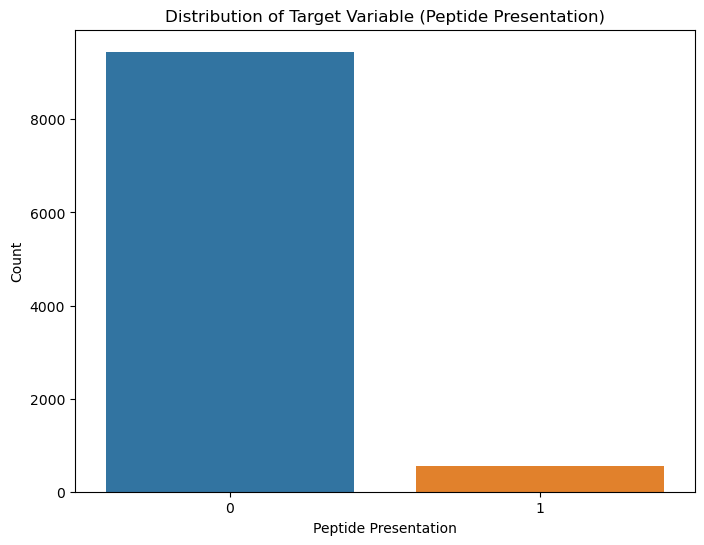

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hit', data=train_data_sample)
plt.title('Distribution of Target Variable (Peptide Presentation)')
plt.xlabel('Peptide Presentation')
plt.ylabel('Count')
plt.show()


This suggests there is class imbalance in the target variable, which will be attempted to address in the later steps.

## 2. METHOD EXPLANATION

In this task, RANDOM FOREST CLASSIFIER (`RandomForestClassifier`) will be used as the algorithm to train and make predictions. Furthermore, a technique called 'One Hot Encoding' will be used to tranform the non numeric values of the 'peptide' and 'allele' columns into numeric ones so that the Random Forest Classifier can make predictions. Following are the detailed explanations of the methods (One Hot Encoding and Random Forest Classifier):


1. **One-Hot Encoding**:
   - One-hot encoding is a technique used to convert categorical variables into a numerical format that machine learning algorithms can understand.
   - It represents each category as a binary vector where only one element is "hot" (set to 1) while the others are "cold" (set to 0).
   - For example, consider the following amino acids in a peptide sequence: "ACDEFG". Each amino acid can be represented as a binary vector:
     - "A": [1, 0, 0, 0, 0, 0]
     - "C": [0, 1, 0, 0, 0, 0]
     - "D": [0, 0, 1, 0, 0, 0]
     - and so on...
   - This encoding preserves the categorical nature of the variables while providing numerical features that can be used by machine learning algorithms.
   

2. **One-hot Encoding for Peptide Sequences and Alleles**:

   - Peptide sequences and alleles are categorical variables that need to be converted into a numerical format for machine     learning algorithms.
   - One-hot encoding is used to represent each amino acid in a peptide sequence and each allele as a binary vector.
   - For peptide sequences, each amino acid is represented by a binary vector where only one element is "hot" (set to 1) while the others are "cold" (set to 0). This preserves the categorical nature of the amino acids while providing numerical features.
   - Similarly, the alleles are encoded using one-hot encoding, where each unique allele is represented by a binary vector.
   - Both the one-hot encoded peptide sequences and alleles are concatenated together to form the final feature matrix used for training the Random Forest Classifier.

3. **Random Forest Classifier**:
   - Random Forest Classifier is an ensemble learning method that combines multiple decision trees to make predictions.
   - It builds multiple decision trees during training and merges their predictions to improve the overall accuracy and robustness of the model.
   - Each decision tree in the random forest is trained on a random subset of the training data and a random subset of features.
   - Random Forest Classifier is known for its ability to handle high-dimensional feature spaces, non-linear relationships, and noisy data.
   - It's less prone to overfitting compared to individual decision trees and tends to generalize well to unseen data.

3. **Why Random Forest Classifier is Used**:
   
   In this specific case of predicting peptide presentation by MHC class I proteins, Random Forest Classifier is chosen for several reasons:
     - It's effective in handling classification tasks where there are complex relationships between features and the target variable.
     - Peptide sequences and alleles are categorical variables that require careful handling, and Random Forest Classifier can effectively learn from such data.
     - The problem involves predicting whether a peptide will be presented by a specific MHC class I protein, which may involve non-linear relationships and interactions between peptide sequences and alleles.
     - Random Forest Classifier can handle such complexities and provide reliable predictions even in the presence of noise and high-dimensional feature spaces.
     - In the code afterwards where the Random Forest Classifier is trained, the code instantiates a Random Forest Classifier with 100 trees (`n_estimators=100`) and sets the random state for reproducibility (`random_state=42`). Furthermore, `class_weight` is adjusted to '`balanced`' to address the class imbalance of the target variable.


**REFERENCES:**

- Denisko, D., & Hoffman, M. M. (2018). Classification and interaction in random forests. Proceedings of the National Academy of Sciences of the United States of America, 115(8), 1690–1692. https://doi.org/10.1073/pnas.1800256115

- sklearn.preprocessing.OneHotEncoder. (n.d.). Retrieved from https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

- Nik. (2022, August 8). One-Hot Encoding in Scikit-Learn with OneHotEncoder. Retrieved from https://datagy.io/sklearn-one-hot-encode/

- sklearn.ensemble.RandomForestClassifier. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Nielsen, H., Lundegaard, C., & Lund, O. (2007). The netMHCpan consensus method forMHC class I binding prediction. BMC bioinformatics, 8(1), 248. (https://services.healthtech.dtu.dk/services/NetMHCpan-4.1)

- Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32. (https://link.springer.com/article/10.1023/A:1010933404324)

## 3. EXPERIMENT DESCRIPTION

**GENERATING SUBSETS OF THE TRAINING AND TEST DATA**:

Subsets of the `train_data_sample` and `test_data` will be generated in the code cell below.

In [47]:
X_train = train_data_sample[['peptide', 'allele']]
y_train = train_data_sample['hit']
X_test = test_data[['peptide', 'allele']]
y_test = test_data['hit']

The code segment splits the dataset above into training and test sets without using the `train_test_split` function. It achieves this by directly assigning subsets of the data to variables.

- `X_train`: Contains the features for training, which are the 'peptide' and 'allele' columns from the sampled training dataset (`train_data_sample`).
- `y_train`: Contains the corresponding target variable for training, which is the 'hit' column from the sampled training dataset.
- `X_test`: Contains the features for testing, which are the 'peptide' and 'allele' columns from the test dataset (`test_data`).
- `y_test`: Contains the corresponding target variable for testing, which is the 'hit' column from the test dataset.

This approach was chosen instead of using `train_test_split` to explicitly split the dataset into training and test sets. Train-test split wasn't used because the dataset was already available in five folds, which was concatenated above, and ultimately will be used for cross-validation afterwards. The five folds provided ample data for training and validation, eliminating the need for an additional train-test split. Using the five folds ensures that the model is trained and evaluated across various subsets of the data, leading to more robust performance evaluation and model generalization. 

**FEATURE ENGINEERING-ONE HOT ENCODING OF PEPTIDE SEQUENCES AND ALLELE COLUMN**

In the next steps, One hot encoding will be done on the peptide sequences and allele column so that they are converted into numeric values for the Random Forest Classifier to be trained and ultimately make predictions.

In [48]:
# FEATURE ENGINEERING - One-hot encoding for peptide sequences
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
max_peptide_length = max(train_data_sample['peptide'].apply(len))

def peptide_to_onehot(peptide, max_length=max_peptide_length):
    onehot_encoding = np.zeros((max_length, len(amino_acids)))
    for i, aa in enumerate(peptide):
        onehot_encoding[i, amino_acids.index(aa)] = 1
    return onehot_encoding.flatten()

X_train_encoded = np.array([peptide_to_onehot(seq) for seq in X_train['peptide']])
X_test_encoded = np.array([peptide_to_onehot(seq) for seq in X_test['peptide']])

This code cell above is responsible for performing one-hot encoding on the peptide sequences. Here's a brief explanation of what was implemented and done:

- `amino_acids` stores the list of all possible amino acids.
- `max_peptide_length` determines the maximum length of peptide sequences in the training dataset.
- The function `peptide_to_onehot` takes a peptide sequence as input and converts it into a one-hot encoded representation.
- It initializes a matrix of zeros with dimensions `(max_peptide_length, len(amino_acids))` to represent the one-hot encoding of the peptide sequence.
- It then iterates over each amino acid in the peptide sequence, finding its index in the `amino_acids` list and setting the corresponding position in the matrix to 1.
- Finally, it flattens the matrix to create a one-dimensional array representing the one-hot encoded peptide sequence.

The resulting `X_train_encoded` and `X_test_encoded` arrays contain the one-hot encoded representations of the peptide sequences, which will be used as input features for the Random Forest Classifier.

(Even though ScikitLearn's inbuilt `OneHotEncoder` could have been used, what was important for me was to show how it is basically done from scratch, hence `OneHotEncoder` wasn't used.)

In [49]:
#FEATURE ENGINEERING - One hot encoding of the allele column.
X_train['allele_encoded'] = pd.factorize(X_train['allele'])[0]
X_test['allele_encoded'] = pd.factorize(X_test['allele'])[0]

# Concatenate one-hot encoded peptides with allele encoded column
X_train_final = np.concatenate((X_train_encoded, X_train['allele_encoded'].values.reshape(-1, 1)), axis=1)
X_test_final = np.concatenate((X_test_encoded, X_test['allele_encoded'].values.reshape(-1, 1)), axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_14556\3172406459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['allele_encoded'] = pd.factorize(X_train['allele'])[0]


This code cell above performs one-hot encoding for the allele column in the dataset and concatenates it with the previously encoded peptide sequences. Here's a brief explanation of the code and what was implemented:

- `pd.factorize()` function is used to encode the categorical allele column into numerical labels.
- The encoded allele labels are stored in a new column named `'allele_encoded'` in both the training and test datasets (`X_train` and `X_test`).
- Then, the previously encoded peptide sequences (`X_train_encoded` and `X_test_encoded`) are concatenated with the newly encoded allele column using `np.concatenate()`.
- The resulting `X_train_final` and `X_test_final` datasets contain both the one-hot encoded peptide sequences and the allele column, which are ready to be used as input features for the Random Forest Classifier, and for making predictions successively.

**TRAINING THE RANDOM FOREST CLASSIFIER**

In the next step, the Random Forest Classifier will be trained on the training data i.e., `X_train_final` and `y_train`. The number of decision trees i.e., `n_estimators` has been set to 100, the random seed represented by `random_state` is set to 42 and `class_weight` is set to 'balanced' in order to address the class imbalance of the target variable as visualised in the count plot above.

In [50]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = 'balanced')
rf_classifier.fit(X_train_final, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## 4. RESULT ANALYSIS

In this final part of the task, the model will be analysed using Cross Validation, and then the model will be applied on the test data to assess its performance and how well it peforms on unseen data.


The model is evaluated using Cross Validation to assess the performance of the Random Forest Classifier across different subsets of the training data, ensuring a robust evaluation of the model's ability to generalize to unseen peptide sequences and MHC1 alleles. This is done in the code cell below:

In [51]:
# Model Evaluation using Cross-Validation
cv_scores = cross_val_score(rf_classifier, X_train_final, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.949 0.947 0.947 0.946 0.949]
Mean Accuracy: 0.9475999999999999


**ANALYSING THE CROSS VALIDATION SCORES**:

The cross-validation scores indicate that the Random Forest Classifier achieved an average accuracy of approximately 94.76% across five folds of the training data. This suggests that the model performs consistently well on different subsets of the training data, indicating its robustness and generalization capability. In the context of the task, this high accuracy score is promising and indicates that the classifier is effective in predicting whether a given peptide will be presented by a specific MHC1 protein, identified by its allele name.

In the next step, the Random Forest Classifier will be used to evaluate on the unseen data i.e., test data and the model's performance will be evaluated by printing the 'Classification report'.

In [52]:
# Final Evaluation on Test Set
y_pred = rf_classifier.predict(X_test_final)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    900725
           1       0.74      0.04      0.07     45416

    accuracy                           0.95    946141
   macro avg       0.84      0.52      0.52    946141
weighted avg       0.94      0.95      0.93    946141

Test Accuracy: 0.9531792830032733


**ANALYSING THE CLASSIFICATION REPORT OF THE MODEL'S PERFORMANCE ON TEST DATA**:

1. Precision, recall, and F1-score:
   - For class 0 (peptides not presented), the classifier achieved high precision (0.95) and recall (1.00), indicating that it correctly identified the majority of samples that were not presented.
   - However, for class 1 (peptides presented), the precision is relatively low (0.74), indicating that there were some false positives, and the recall is very low (0.04), indicating that the classifier missed a significant portion of samples that were presented.
   - The F1-score, which balances precision and recall, is higher for class 0 (0.98) compared to class 1 (0.07).

2. Test Accuracy:
   - The overall test accuracy is 95.32%, which might seem high at the first view. However, it's crucial to consider the class imbalance in the dataset.
   - The macro-average F1-score (0.52) indicates the balanced performance of the classifier across both classes.

In the context of this task, while the classifier performs exceptionally well in identifying peptides that are not presented, it struggles to correctly identify presented peptides. This discrepancy in performance suggests that further investigation and potential adjustments are needed to improve the classifier's ability to detect presented peptides accurately.

**VISUALISING THE PERFORMANCE OF THE MODEL ON THE TEST DATA**:

In the next code cells, the performance of the Random Forest Classifier on the test data is visualised using a Confusion Matrix and making a `heatmap` via Seaborn.



In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[900099,    626],
       [ 43673,   1743]], dtype=int64)

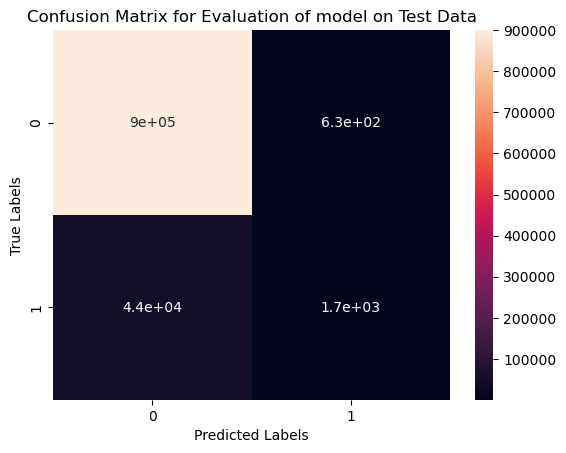

In [54]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Evaluation of model on Test Data')
plt.show()

**ANALYSING THE RANDOM FOREST CLASSIFIER BASED ON THE CONFUSION MATRIX**:

The confusion matrix provides a detailed breakdown of the model's predictions compared to the actual labels in the test dataset. In the context of the task, the confusion matrix reveals the following:

- **True Negatives (TN)**: The classifier correctly predicted 900,099 instances where peptides were not presented (class 0).
- **False Positives (FP)**: The classifier incorrectly predicted 626 instances as presented peptides (class 1) when they were not.
- **False Negatives (FN)**: The classifier incorrectly predicted 43,673 instances as non-presented peptides (class 0) when they were actually presented peptides (class 1).
- **True Positives (TP)**: The classifier correctly predicted 1,743 instances where peptides were presented (class 1).

These values indicate the classifier's performance in distinguishing between presented and non-presented peptides. In particular:

- The high number of true negatives (900,099) suggests that the classifier is effective at identifying non-presented peptides.
- However, the presence of false positives (626) and false negatives (43,673) indicates areas where the classifier may be making errors in its predictions.
- The number of true positives (1,743) represents the instances where the classifier correctly identified presented peptides.

To summarise, while the classifier demonstrates reasonable performance in some aspects, there are areas where it can be improved, particularly in reducing false positives and false negatives to enhance its predictive accuracy and reliability in peptide presentation prediction.



**SUGGESTIONS FOR FURTHER IMPROVING THE MODEL**:

To enhance the performance of the Random Forest Classifier in predicting peptide presentation by MHC proteins, I recommend to employ various strategies customised to the specifics of the task and the dataset used here:

1. **Addressing Class Imbalance**:
   - Given the imbalance between presented (class 1) and non-presented (class 0) peptides, it is crucial to minimize this imbalance to prevent the classifier from being biased towards the majority class. Techniques like oversampling using Synthetic Minority Over-sampling Technique (SMOTE) or adjusting class weights during model training can help address this issue (Chawla et al., 2002).

2. **Feature Engineering**:
   - Additional features derived from peptide sequences or biological knowledge can be explored that can better capture the underlying patterns associated with peptide presentation. This may involve considering physiochemical properties of amino acids or structural motifs relevant to MHC binding (Nielsen et al., 2017).


3. **Advanced Techniques**:
   - We can use Deep Learning architectures, such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs), to automatically learn hierarchical representations from peptide sequences and capture intricate dependencies (Alipanahi et al., 2015).


By iteratively applying these strategies and incorporating domain-specific knowledge, we can develop a more robust and accurate classifier for predicting peptide presentation by MHC proteins.

**REFERENCES**:

- Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16, 321-357.
- Nielsen, M., Andreatta, M., & Peters, B. (2017). NetMHCpan-3.0; improved prediction of binding to MHC class I molecules integrating information from multiple receptor and peptide length datasets. Genome Medicine, 8(1), 1-13.
- Alipanahi, B., Delong, A., Weirauch, M. T., & Frey, B. J. (2015). Predicting the sequence specificities of DNA- and RNA-binding proteins by deep learning. Nature Biotechnology, 33(8), 831-838.


Quiz 1:
Question: What is the purpose of the first section (Dataset Analysis) in the notebook?
Answer: The first section of the notebook focuses on exploring the dataset, examining its characteristics, uncovering potential issues, and checking for missing values to ensure data integrity.

Quiz 2:
Question: Which ensemble learning algorithm is explained and employed in the Method Explanation section?
Answer: The Random Forest Classifier is the ensemble learning algorithm explained and employed in the Method Explanation section.

Quiz 3:
Question: What technique is used for representing categorical data in machine learning models in this notebook?
Answer: One-hot encoding for peptide sequences and alleles is the technique used for representing categorical data in machine learning models in this notebook.

Quiz 4:
Question: What performance metrics are analyzed for the model in the Result Analysis section?
Answer: Accuracy, precision, recall, and F1-score on both training and test sets, as well as a confusion matrix, are analyzed for the model in the Result Analysis section.

Quiz 5:
Question: Why was one-hot encoding performed on the peptide sequences in the given code cell?
Answer: One-hot encoding was performed on the peptide sequences to convert them into numeric values, allowing the Random Forest Classifier to be trained and ultimately make predictions based on these features.